### 統計學習與深度學習
### Homework 5

請將IPYNB檔與IPYNB Export之HTML檔上傳至COOL作業區。回答作業時建議使用 "三明治" 答題法。也就是說，先說明要做什麼，然後列出程式碼與結果，最後說明這些結果的意義。作業自己做。嚴禁抄襲。不接受紙本繳交，不接受遲交。請以英文或中文作答。

這個作業將要練習影像分類的問題。影像分類是CNN模型的強項，我們的任務是區分照片中主角穿的上衣類型。這個問題在不同的情境下有不同的難度。在`Dive into Deep Learning`中有類似的問題，但是處理較"乾淨"的影像。這次作業的資料來自街拍影像，因此分類的困難度較高。

我們這次作業的任務，是依照照片中人物的上衣，區分以下類別:
* blazer
* cardigan
* coat
* jacket

下面列出這四個類別的範例訓練資料。

Label =  blazer


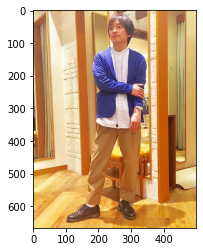

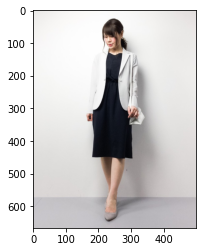

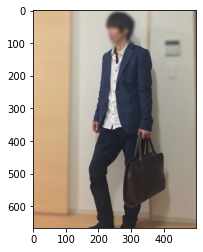

Label =  cardigan


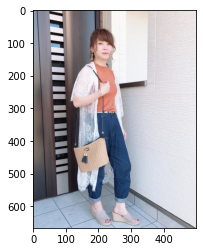

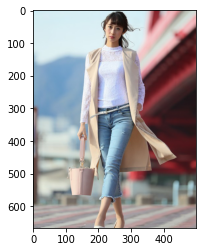

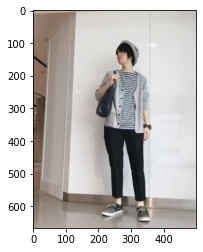

Label =  coat


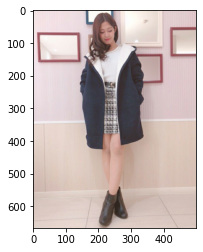

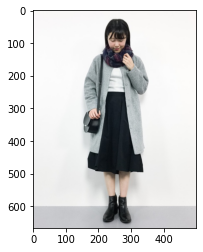

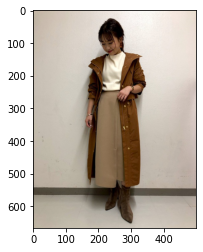

Label =  jacket


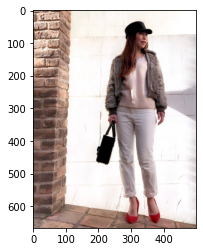

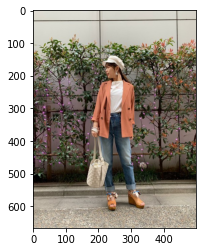

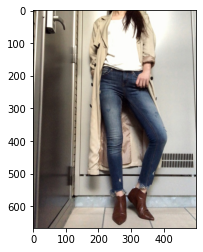

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
from PIL import Image
import os
import glob
import random

random.seed(1223)
labels = ['blazer', 'cardigan', 'coat', 'jacket']
for i in range(4):
    print("Label = ", labels[i])
    basepath = os.path.join("photos/train", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    for afn in random.choices(cand_fn, k = 3):    
        img = Image.open(afn)
        plt.imshow(img)
        plt.show()

### 資料
資料在`photos`資料夾。已經區分好訓練(train)、校正(valid)、測試(test)資料。下一層則是依照圖片的標籤分資料夾存放，因此有四個資料夾，分別是blazer, cardigan, coat, jacket。一張圖片只會屬於一個類別。

### Q1
(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?

### Q2
(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

### Q3
(30%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。模型訓練時固定除了最後一層以外的其他權重。也就是說，模型訓練只會調整最後一層Fully Connected Layer。圖片前處理與前題一致。

使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q4
(20%) 使用Resnet50建構圖片分類模型。將最後一層的fully connected layer輸出維度改成4以符合本題任務需求。圖片前處理與前題一致。不使用預訓練權重初始化模型。使用train訓練模型，以valid決定early stopping的epoch。Early stopping的patient參數為20 epochs。Batch size設為32。紀錄valid loss最低的模型，並在test中計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的valid loss。

### Q5
(10%) 統整併討論Q2-Q4的預測能力。說明你的觀察。

## Q1


(5%) 列出train, valid, test的總照片數，以及各類別的照片數與比率。在還沒進行模型訓練與評估前，你認為各類別相對的準確率的大小關係為何?

In [17]:
for folder in ['train', 'valid', 'test']:
    blaz, card, coat, jack = 0, 0, 0, 0
    fsum = 0

    for label in labels:
        path = os.path.join("photos/" + folder, label, "*.jpg")
        pnglist = glob.glob(path)
        fsum += len(pnglist)
        
        if label == 'blazer': blaz = len(pnglist)
        elif label == 'cardigan': card = len(pnglist)
        elif label == 'coat': coat = len(pnglist)
        elif label == 'jacket': jack = len(pnglist)

    print(f'{folder}: {fsum} photos')
    print(f'  blazer: {blaz} ({round(blaz/fsum*100)}%)')
    print(f'  cardigan: {card} ({round(card/fsum*100)}%)')
    print(f'  coat: {coat} ({round(coat/fsum*100)}%)')
    print(f'  jacket: {jack} ({round(jack/fsum*100)}%)')
    print('\n')


train: 1041 photos
  blazer: 97 (9%)
  cardigan: 237 (23%)
  coat: 296 (28%)
  jacket: 411 (39%)


valid: 105 photos
  blazer: 7 (7%)
  cardigan: 36 (34%)
  coat: 27 (26%)
  jacket: 35 (33%)


test: 146 photos
  blazer: 9 (6%)
  cardigan: 42 (29%)
  coat: 43 (29%)
  jacket: 52 (36%)




三種資料集裡都是jacket數量最多，blazer數量最少，而cardigan在訓練資料中比coat還少一點，所以根據資料的數量，我猜測準確率大小為：jacket > coat > cardigan > blazer。

## Q2

(35%) 使用Resnet50建構圖片分類模型。將最後一層的Fully Connected Layer輸出維度改成4以符合本題任務需求。除了最後一層以外，使用torchvision提供的pretrained weights (`torchvision.models.resnet50(pretrained=True)`)初始化模型權重。使用train資料訓練模型，以valid資料決定Early Stopping的Epoch。Early Stopping的Patient參數設為20 Epochs。Batch size設為32。每一個Epoch計算一次Valid Loss，並記錄Valid Loss最低的模型。模型訓練最多200個Epochs。使用最佳模型在test資料計算模型Accuracy, Confusion Matrix, 與Per-class Accuracy。你應該要考慮SGD與ADAM兩種最佳化演算法。調整超參數以達到最好的Valid Loss。

由於圖片的解析度較高，模型訓練前須將解析度調整(Resize)成較短邊為256像素的照片，然後隨機取大小為224x224的影像。接著隨機水平翻轉(Horizontal Flip)、隨機旋轉-20度到20度，並依照Pretrained ResNet的要求調整RGB的均數與標準差。
測試資料(Valid and Test)亦須先將解析度調整(Resize)成較短邊為256像素的照片，然後取圖片中心224x224的影像。

得到Per-Class Accuracy之後，請討論與Q1預期的差異與可能原因。

提示: 
* Pytorch Resnet pretrained model的說明請見 <https://pytorch.org/hub/pytorch_vision_resnet/>
* 本題的Test Accuracy應高於78%。

Import some packages

In [181]:
import os
import cv2
import time
import random
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as T
from torchvision.utils import make_grid
from torchvision.models import resnet50 

from sklearn.model_selection import train_test_split

from PIL import Image

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from torch.optim import Optimizer as optimizer

Get all photos' path

In [182]:
labels = ['blazer', 'cardigan', 'coat', 'jacket']
train_imgs = []
test_imgs = []
valid_imgs = []

for i in range(4):
    basepath = os.path.join("photos/train", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    train_imgs = train_imgs + cand_fn
print(len(train_imgs)) 

for i in range(4):
    basepath = os.path.join("photos/valid", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    valid_imgs = valid_imgs + cand_fn
print(len(valid_imgs))

for i in range(4):
    basepath = os.path.join("photos/test", labels[i], "*.jpg")
    cand_fn = glob.glob(basepath)
    test_imgs = test_imgs + cand_fn
print(len(test_imgs))


1041
105
146


In [50]:
train_imgs[0]

'photos/train/blazer/20191101193003070_500.jpg'

In [51]:
train_imgs[0].split('/')[2]

'blazer'

In [183]:
DIR_TRAIN = "./photos/train/"
DIR_TEST = "./photos/test/"
DIR_VAL = "./photos/valid/"

class_to_int = {"blazer" : 0, "cardigan" : 1, "coat": 2, "jacket": 3}
int_to_class = {0 : "blazer", 1 : "cardigan", 2: "coat", 3: "jacket"}

Photo preprocess

In [184]:
get_train_transform = T.Compose([
    T.Resize(256),
    T.RandomCrop(224),
    T.RandomHorizontalFlip(),
    T.RandomRotation(degrees=20),
    T.ToTensor(),                   
    T.Normalize((0, 0, 0),(1, 1, 1))
])
    
get_val_transform = T.Compose([
    T.Resize(256),
    T.RandomCrop(224),
    T.ToTensor(),
    T.Normalize((0, 0, 0),(1, 1, 1))
])

Dataset Class - for retriving images and labels

In [185]:
class imgDataset(Dataset):
    
    def __init__(self, imgs, class_to_int, mode='train', transforms=None):
        
        super().__init__()
        self.imgs = imgs
        self.class_to_int = class_to_int
        self.mode = mode
        self.transforms = transforms
        
    def __getitem__(self, idx):

        image_path = self.imgs[idx]
        img = Image.open(image_path)
        # img = img.resize((224, 224))

        # plt.imshow(img)
        # plt.show()
        
        ### Preparing class label
        label_list = [0, 0, 0, 0]
        label_int = self.class_to_int[image_path.split('/')[2]] 
        label_list[label_int] = 1
        label = torch.FloatTensor(label_list)
        # print(label)

        ### Apply Transforms on image
        transform_img = self.transforms(img)

        return transform_img, label
        
        
    def __len__(self):
        return len(self.imgs)

DataLoader

In [186]:
train_dataset = imgDataset(train_imgs, class_to_int, mode='train', transforms=get_train_transform)
valid_dataset = imgDataset(valid_imgs, class_to_int, mode='valid', transforms=get_val_transform)
test_dataset = imgDataset(test_imgs, class_to_int, mode='test', transforms=get_val_transform)

train_data_loader = DataLoader(
    dataset = train_dataset,
    num_workers = 1,
    batch_size = 32,
    shuffle = True
)

valid_data_loader = DataLoader(
    dataset = valid_dataset,
    num_workers = 1,
    batch_size = 32,
    shuffle = True
)

test_data_loader = DataLoader(
    dataset = test_dataset,
    num_workers = 1,
    batch_size = 32,
    shuffle = True
)

check train_data_loader

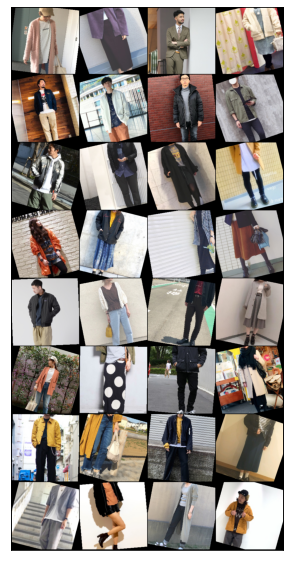

In [187]:
for images, labels in train_data_loader:
    
    fig, ax = plt.subplots(figsize = (10, 10))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images, 4).permute(1,2,0))
    plt.show()
    break

In [168]:
# GPU
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
print(device)

cuda


Function - One Epoch Train

In [188]:
def train_one_epoch(train_data_loader):
    
    ### Local Parameters
    epoch_loss = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in train_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 4)) # [N, 4] - to match with preds shape
        
        #Reseting Gradients (reset)
        optimizer.zero_grad()
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
        #Backward (update)
        _loss.backward()
        optimizer.step()
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Loss
    epoch_loss = np.mean(epoch_loss)
    
    ###Storing results to logs
    train_logs["loss"].append(epoch_loss)
    train_logs["time"].append(total_time)
        
    return epoch_loss, total_time

Function - One Epoch Valid

In [189]:
def valid_one_epoch(valid_data_loader, best_val_loss):
    
    ### Local Parameters
    epoch_loss = []
    start_time = time.time()
    
    ###Iterating over data loader
    for images, labels in valid_data_loader:
        
        #Loading images and labels to device
        images = images.to(device)
        labels = labels.to(device)
        labels = labels.reshape((labels.shape[0], 4)) # [N, 4] - to match with preds shape
        
        #Forward
        preds = model(images)
        
        #Calculating Loss
        _loss = criterion(preds, labels)
        loss = _loss.item()
        epoch_loss.append(loss)
        
    
    ###Overall Epoch Results
    end_time = time.time()
    total_time = end_time - start_time
    
    ###Acc and Loss
    ep_loss = np.mean(epoch_loss)
    
    ###Storing results to logs
    val_logs["loss"].append(ep_loss)
    val_logs["time"].append(total_time)
    
    ###Saving best model
    if ep_loss < best_val_loss:
        best_val_loss = ep_loss
        torch.save(model.state_dict(), "resnet50_best.pth")
        
    return ep_loss, total_time, best_val_loss

In [190]:
model = resnet50(pretrained = True)
model.fc = nn.Sequential(
    nn.Dropout(p=0.5),
    nn.Linear(2048, 4, bias = True), # out-dimension = 4
    nn.Sigmoid()
)

Adam algorithm

In [192]:
# Optimizer
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

# Learning Rate Scheduler
# lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size = 3, gamma = 0.5)

#Loss Function
criterion = nn.BCELoss() 

# Logs - Helpful for plotting after training finishes
train_logs = {"loss" : [], "time" : []}
val_logs = {"loss" : [], "time" : []}

# Loading model to device
model.to(device)

# No of epochs 
epochs = 200

Training and Validation

In [194]:
best_val_loss = 10000
early_stop_count = 0
for epoch in range(epochs):

    if early_stop_count >= 20:
        print("Early Stop!")
        break
    
    ###Training
    train_loss, train_time = train_one_epoch(train_data_loader)
    
    ###Validation
    valid_loss, valid_time, best_val_loss = valid_one_epoch(valid_data_loader, best_val_loss)

    if valid_loss > best_val_loss:
        early_stop_count += 1
    else: # valid loss is improved
        early_stop_count = 0
    
    #Print Epoch Details
    print("Epoch {}".format(epoch+1))
    print("training Loss : {}".format(round(train_loss, 4)))
    print("validating Loss : {}".format(round(valid_loss, 4)))
    print("best valid loss : {} \n".format(round(best_val_loss, 4)))
    

RuntimeError: CUDA out of memory. Tried to allocate 20.00 MiB (GPU 0; 7.92 GiB total capacity; 6.98 GiB already allocated; 10.44 MiB free; 7.13 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF

In [ ]:
def accuracy(preds, trues):
    
    ### Converting preds[0, 1] to 0, 1, 2, 3
    preds2 = []
    for i in range(len(preds)):
        if preds[i] >= 0 and pred[i] < 0.25: preds2.append(0)
        elif preds[i] >= 0.25 and pred[i] < 0.5: preds2.append(1)
        elif preds[i] >= 0.5 and pred[i] < 0.75: preds2.append(2)
        else: preds2.append(3)
    
    ### Calculating accuracy by comparing predictions with true labels
    total_acc, blaz_acc, card_acc, coat_acc, jack_acc = [], [], [], [], []

    for i in range(len(preds2)):
        if preds2[i] == trues[i]: 
            total_acc.append(1)

            if trues[i] == 0: blaz_acc.append(1)
            elif trues[i] == 1: card_acc.append(1)
            elif trues[i] == 2: coat_acc.append(1)
            else: jack_acc.append(1)

        else:
            total_acc.append(0)
            blaz_acc.append(0)
            card_acc.append(0)
            coat_acc.append(0)
            jack_acc.append(0)
    
    ### Summing over all correct predictions
    accall = sum(total_acc) / len(preds2)
    acc0 = sum(blaz_acc) / 9
    acc1 = sum(card_acc) / 42
    acc2 = sum(coat_acc) / 43
    acc3 = sum(jack_acc) / 52
    
    return accall, acc0, acc1, acc2, acc3